In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df=pd.read_csv("AmesHousing.csv")

In [3]:
# Selecting numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()

# Dropping ID column if present
numeric_df.drop(columns=['Id'], inplace=True, errors='ignore')

# Dropping rows with missing values (simple method for now)
numeric_df.dropna(inplace=True)

# Defining features (X) and target (y)
X = numeric_df.drop("SalePrice", axis=1)
y = numeric_df["SalePrice"]

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (1819, 38)
Testing shape: (455, 38)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Training Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R²: {r2_lr:.2f}")


Linear Regression RMSE: 37384.81
Linear Regression R²: 0.79


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")


Random Forest RMSE: 27554.74
Random Forest R²: 0.89


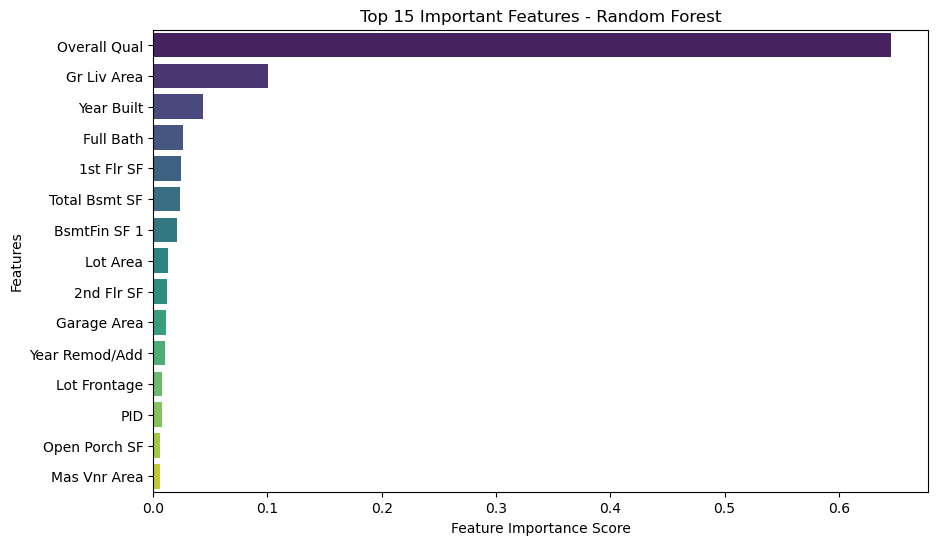

In [7]:
# Recalculating feature importance from Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Getting top 15 important features
top_features = feature_importance.sort_values(ascending=False).head(15)

# Plotting the factors
plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index, hue=top_features.index, palette="viridis", legend=False)
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()


In [8]:
# Creating comparison table for comparison of models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_rf],
    'R² Score': [r2_lr, r2_rf]
})
print(results)

               Model          RMSE  R² Score
0  Linear Regression  37384.808496  0.793418
1      Random Forest  27554.736067  0.887773


In [9]:
# Top features by importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).head(15)


Overall Qual      0.645755
Gr Liv Area       0.100524
Year Built        0.043325
Full Bath         0.026042
1st Flr SF        0.024411
Total Bsmt SF     0.023822
BsmtFin SF 1      0.020697
Lot Area          0.013235
2nd Flr SF        0.012002
Garage Area       0.011110
Year Remod/Add    0.010508
Lot Frontage      0.008152
PID               0.007743
Open Porch SF     0.005663
Mas Vnr Area      0.005601
dtype: float64

In [10]:
!pip install xgboost --quiet

In [11]:
from xgboost import XGBRegressor

In [12]:
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R²: {r2_xgb:.2f}")



XGBoost RMSE: 25936.17
XGBoost R²: 0.90


In [13]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'R² Score': [r2_lr, r2_rf, r2_xgb]
})

print(results)


               Model          RMSE  R² Score
0  Linear Regression  37384.808496  0.793418
1      Random Forest  27554.736067  0.887773
2            XGBoost  25936.173966  0.900571
